In [1]:
# import libraries
import pandas as pd
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta
import plotly.figure_factory as ff
import plotly.express as px


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Tinashe-04/Formula-2/main/all_races_new_copy.csv')
df.head(10)

,Unnamed: 0,LAPS,TIME,GAP,INT.,KPH,BEST,LAP,POS,CAR,PILOT NAME,TEAM,CIRCUIT,TYPE,ROUND,DATE
0,0,32,58:18.977,0.000,0.000,177.931,1:46.038,24.0,1.0,6,A. Markelov,RUSSIAN TIME,Sakhir,Feature Race,Round 1,2017-04-16
1,1,32,58:26.868,7.891,7.891,177.530,1:46.187,18.0,2.0,20,N. Nato,Pertamina Arden,Sakhir,Feature Race,Round 1,2017-04-16
2,2,32,58:32.757,13.780,5.889,177.233,1:46.550,24.0,3.0,1,C. Leclerc,PREMA Racing,Sakhir,Feature Race,Round 1,2017-04-16
3,3,32,58:36.455,17.478,3.698,177.046,1:46.729,19.0,4.0,15,J. King,MP Motorsport,Sakhir,Feature Race,Round 1,2017-04-16
4,4,32,58:37.121,18.144,0.666,177.013,1:46.761,21.0,5.0,9,O. Rowland,DAMS,Sakhir,Feature Race,Round 1,2017-04-16
5,5,32,58:38.721,19.744,1.600,176.932,1:46.171,19.0,6.0,8,A. Albon,ART Grand Prix,Sakhir,Feature Race,Round 1,2017-04-16
6,6,32,58:46.033,27.056,7.312,176.565,1:46.787,20.0,7.0,5,L. Ghiotto,RUSSIAN TIME,Sakhir,Feature Race,Round 1,2017-04-16
7,7,32,58:48.948,29.971,2.915,176.419,1:46.668,23.0,8.0,7,N. Matsushita,ART Grand Prix,Sakhir,Feature Race,Round 1,2017-04-16
8,8,32,58:49.927,30.950,0.979,176.370,1:46.969,28.0,9.0,2,A. Fuoco,PREMA Racing,Sakhir,Feature Race,Round 1,2017-04-16
9,9,32,58:54.703,35.726,4.776,176.132,1:46.901,22.0,10.0,18,N. de Vries,Rapax,Sakhir,Feature Race,Round 1,2017-04-16


In [3]:
# drop unnamed row
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,LAPS,TIME,GAP,INT.,KPH,BEST,LAP,POS,CAR,PILOT NAME,TEAM,CIRCUIT,TYPE,ROUND,DATE
0,32,58:18.977,0.000,0.000,177.931,1:46.038,24.0,1.0,6,A. Markelov,RUSSIAN TIME,Sakhir,Feature Race,Round 1,2017-04-16
1,32,58:26.868,7.891,7.891,177.530,1:46.187,18.0,2.0,20,N. Nato,Pertamina Arden,Sakhir,Feature Race,Round 1,2017-04-16
2,32,58:32.757,13.780,5.889,177.233,1:46.550,24.0,3.0,1,C. Leclerc,PREMA Racing,Sakhir,Feature Race,Round 1,2017-04-16
3,32,58:36.455,17.478,3.698,177.046,1:46.729,19.0,4.0,15,J. King,MP Motorsport,Sakhir,Feature Race,Round 1,2017-04-16
4,32,58:37.121,18.144,0.666,177.013,1:46.761,21.0,5.0,9,O. Rowland,DAMS,Sakhir,Feature Race,Round 1,2017-04-16


In [4]:
df.columns

Index(['LAPS', 'TIME', 'GAP', 'INT.', 'KPH', 'BEST', 'LAP', 'POS', 'CAR',
       'PILOT NAME', 'TEAM', 'CIRCUIT', 'TYPE', 'ROUND', 'DATE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LAPS        2905 non-null   int64  
 1   TIME        2905 non-null   object 
 2   GAP         2905 non-null   object 
 3   INT.        2905 non-null   object 
 4   KPH         2905 non-null   float64
 5   BEST        2905 non-null   object 
 6   LAP         2905 non-null   float64
 7   POS         2904 non-null   float64
 8   CAR         2905 non-null   int64  
 9   PILOT NAME  2905 non-null   object 
 10  TEAM        2905 non-null   object 
 11  CIRCUIT     2905 non-null   object 
 12  TYPE        2905 non-null   object 
 13  ROUND       2905 non-null   object 
 14  DATE        2905 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 340.6+ KB


In [6]:
# change format of the TIME column to datetime
# create a function that uses regular expressions for the different formats of strings
# first form is '[0-9][0-9]:[0-9][0-9].[0-9][0-9][0-9]'
# second form is '[0-9]:[0-9][0-9]:[0-9][0-9].[0-9][0-9][0-9]'
# convert to datetime in the form %M:%S.%f if the string fits the first form
# convert to datetime in the form %I:%M:%S.%f if the string fits the second form
df['TIME'] = [x + '000' for x in df['TIME']]
df.head(10)

,LAPS,TIME,GAP,INT.,KPH,BEST,LAP,POS,CAR,PILOT NAME,TEAM,CIRCUIT,TYPE,ROUND,DATE
0,32,58:18.977000,0.000,0.000,177.931,1:46.038,24.0,1.0,6,A. Markelov,RUSSIAN TIME,Sakhir,Feature Race,Round 1,2017-04-16
1,32,58:26.868000,7.891,7.891,177.530,1:46.187,18.0,2.0,20,N. Nato,Pertamina Arden,Sakhir,Feature Race,Round 1,2017-04-16
2,32,58:32.757000,13.780,5.889,177.233,1:46.550,24.0,3.0,1,C. Leclerc,PREMA Racing,Sakhir,Feature Race,Round 1,2017-04-16
3,32,58:36.455000,17.478,3.698,177.046,1:46.729,19.0,4.0,15,J. King,MP Motorsport,Sakhir,Feature Race,Round 1,2017-04-16
4,32,58:37.121000,18.144,0.666,177.013,1:46.761,21.0,5.0,9,O. Rowland,DAMS,Sakhir,Feature Race,Round 1,2017-04-16
5,32,58:38.721000,19.744,1.600,176.932,1:46.171,19.0,6.0,8,A. Albon,ART Grand Prix,Sakhir,Feature Race,Round 1,2017-04-16
6,32,58:46.033000,27.056,7.312,176.565,1:46.787,20.0,7.0,5,L. Ghiotto,RUSSIAN TIME,Sakhir,Feature Race,Round 1,2017-04-16
7,32,58:48.948000,29.971,2.915,176.419,1:46.668,23.0,8.0,7,N. Matsushita,ART Grand Prix,Sakhir,Feature Race,Round 1,2017-04-16
8,32,58:49.927000,30.950,0.979,176.370,1:46.969,28.0,9.0,2,A. Fuoco,PREMA Racing,Sakhir,Feature Race,Round 1,2017-04-16
9,32,58:54.703000,35.726,4.776,176.132,1:46.901,22.0,10.0,18,N. de Vries,Rapax,Sakhir,Feature Race,Round 1,2017-04-16


In [7]:
# add 000 to all time strings to make conversion to microseconds easier
df['GAP'] = [i + '000' for i in df['GAP']]
df['INT.'] = [j + '000' for j in df['INT.']]
df['BEST'] = [k + '000' for k in df['BEST']]
df.head(10)

,LAPS,TIME,GAP,INT.,KPH,BEST,LAP,POS,CAR,PILOT NAME,TEAM,CIRCUIT,TYPE,ROUND,DATE
0,32,58:18.977000,0.000000,0.000000,177.931,1:46.038000,24.0,1.0,6,A. Markelov,RUSSIAN TIME,Sakhir,Feature Race,Round 1,2017-04-16
1,32,58:26.868000,7.891000,7.891000,177.530,1:46.187000,18.0,2.0,20,N. Nato,Pertamina Arden,Sakhir,Feature Race,Round 1,2017-04-16
2,32,58:32.757000,13.780000,5.889000,177.233,1:46.550000,24.0,3.0,1,C. Leclerc,PREMA Racing,Sakhir,Feature Race,Round 1,2017-04-16
3,32,58:36.455000,17.478000,3.698000,177.046,1:46.729000,19.0,4.0,15,J. King,MP Motorsport,Sakhir,Feature Race,Round 1,2017-04-16
4,32,58:37.121000,18.144000,0.666000,177.013,1:46.761000,21.0,5.0,9,O. Rowland,DAMS,Sakhir,Feature Race,Round 1,2017-04-16
5,32,58:38.721000,19.744000,1.600000,176.932,1:46.171000,19.0,6.0,8,A. Albon,ART Grand Prix,Sakhir,Feature Race,Round 1,2017-04-16
6,32,58:46.033000,27.056000,7.312000,176.565,1:46.787000,20.0,7.0,5,L. Ghiotto,RUSSIAN TIME,Sakhir,Feature Race,Round 1,2017-04-16
7,32,58:48.948000,29.971000,2.915000,176.419,1:46.668000,23.0,8.0,7,N. Matsushita,ART Grand Prix,Sakhir,Feature Race,Round 1,2017-04-16
8,32,58:49.927000,30.950000,0.979000,176.370,1:46.969000,28.0,9.0,2,A. Fuoco,PREMA Racing,Sakhir,Feature Race,Round 1,2017-04-16
9,32,58:54.703000,35.726000,4.776000,176.132,1:46.901000,22.0,10.0,18,N. de Vries,Rapax,Sakhir,Feature Race,Round 1,2017-04-16


In [8]:
# find out which position is missing
# S. Sette Camara was disqualified from the race
# potential solution: convert value to blank string ''
# error/problem: entire row dtype changes to object, becomes harder to work with
# potential solution: convert column from float to int
# error/problem: can't convert null values to int error
# leave open to suggestion for ***IMPROVEMENTS***
df[df['POS'].isnull()]

,LAPS,TIME,GAP,INT.,KPH,BEST,LAP,POS,CAR,PILOT NAME,TEAM,CIRCUIT,TYPE,ROUND,DATE
457,21,41:34.705000,2.604000,2.604000,181.765,1:57.663000,15.0,NaN,18,S. Sette Câmara,Carlin,Baku,Sprint Race,Round 2,2018-04-29


In [9]:
# convert the TIME column to datetime data type
# first_time = df['TIME'][0]
# first_time = datetime.strptime(first_time, '%M:%S.%f')

# df['NEW TIME'] = [datetime.strptime(x, '%M:%S.%f') for x in df['TIME']]
# df.head()

In [10]:
### use plotly for plotting cities that host races

# find out what cities are in the circuit column
df['CIRCUIT'].unique()

array(['Sakhir', 'Barcelona', 'Monte Carlo', 'Baku', 'Spielberg',
       'Silverstone', 'Budapest', 'Spa-Francorchamps', 'Monza',
       'Jerez de la Frontera', 'Yas Island', 'Le Castellet', 'Sochi',
       'Mugello', 'Sakhir ', 'Jeddah', 'Imola', 'Zandvoort', 'Melbourne'],
      dtype=object)

In [11]:
# use plotly for plotting cities that host races

# adjust the appearance of the second 'Sakhir' string by removing the space
df['CIRCUIT'] = df['CIRCUIT'].apply(lambda x: x.strip() if x == 'Sakhir ' else x)
df['CIRCUIT'].unique()

array(['Sakhir', 'Barcelona', 'Monte Carlo', 'Baku', 'Spielberg',
       'Silverstone', 'Budapest', 'Spa-Francorchamps', 'Monza',
       'Jerez de la Frontera', 'Yas Island', 'Le Castellet', 'Sochi',
       'Mugello', 'Jeddah', 'Imola', 'Zandvoort', 'Melbourne'],
      dtype=object)

In [12]:
### use plotly for plotting cities that host races

# map each city to a column for its country
# create a function that makes a dictionary to map each city as its key to a country value
def to_country(city):
    '''
    Purpose: to convert a city to a country
    Inputs: city, string that denotes the name of the city to be converted
    Returns: the name of the country to which that city belongs
    '''

    # create a list of countries for each city in the circuit list
    country_list = ['Bahrain', 'Spain', 'Monaco', 'Azerbaijan', 'Austria', 'United Kingdom', 'Hungary', 'Belgium', 'Italy',
    'Spain', 'United Arab Emirates', 'France', 'Russia', 'Italy', 'Saudi Arabia', 'Italy', 'Netherlands', 'Australia']

    # create a dictionary to map each city to the country name
    country = {df['CIRCUIT'].unique()[i]: country_list[i] for i in range(0, df['CIRCUIT'].nunique())}

    # return correct value of country name
    return country[city]

# apply the function to the data
df['COUNTRY'] = df['CIRCUIT'].apply(to_country)
df

,LAPS,TIME,GAP,INT.,KPH,BEST,LAP,POS,CAR,PILOT NAME,TEAM,CIRCUIT,TYPE,ROUND,DATE,COUNTRY
0,32,58:18.977000,0.000000,0.000000,177.931,1:46.038000,24.0,1.0,6,A. Markelov,RUSSIAN TIME,Sakhir,Feature Race,Round 1,2017-04-16,Bahrain
1,32,58:26.868000,7.891000,7.891000,177.530,1:46.187000,18.0,2.0,20,N. Nato,Pertamina Arden,Sakhir,Feature Race,Round 1,2017-04-16,Bahrain
2,32,58:32.757000,13.780000,5.889000,177.233,1:46.550000,24.0,3.0,1,C. Leclerc,PREMA Racing,Sakhir,Feature Race,Round 1,2017-04-16,Bahrain
3,32,58:36.455000,17.478000,3.698000,177.046,1:46.729000,19.0,4.0,15,J. King,MP Motorsport,Sakhir,Feature Race,Round 1,2017-04-16,Bahrain
4,32,58:37.121000,18.144000,0.666000,177.013,1:46.761000,21.0,5.0,9,O. Rowland,DAMS,Sakhir,Feature Race,Round 1,2017-04-16,Bahrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,28,45:11.179000,28.035000,0.549000,162.829,1:34.679000,22.0,16.0,20,R. Stanek,Trident,Budapest,Sprint Race,Round 10,2023-07-23 00:00:00,Hungary
2901,28,45:16.130000,32.986000,4.951000,162.533,1:32.916000,20.0,17.0,16,R. Nissany,PHM Racing by Charouz,Budapest,Sprint Race,Round 10,2023-07-23 00:00:00,Hungary
2902,28,45:20.533000,37.389000,4.403000,162.269,1:34.845000,17.0,18.0,17,B. Benavides,PHM Racing by Charouz,Budapest,Sprint Race,Round 10,2023-07-23 00:00:00,Hungary
2903,28,45:21.157000,38.013000,0.624000,162.232,1:34.887000,7.0,19.0,15,A. Cordeel,Invicta Virtuosi Racing,Budapest,Sprint Race,Round 10,2023-07-23 00:00:00,Hungary


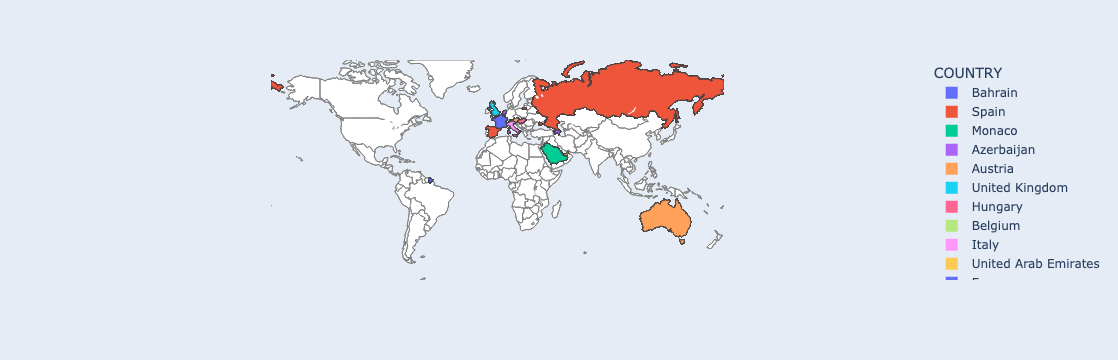

In [13]:
# use plotly for plotting countries that host races

fig = px.choropleth(df, locations='COUNTRY', locationmode='country names', color='COUNTRY') # creates the plot
fig.layout.geo.showframe = False                # removes the black outermost border from the default plot
fig.layout.geo.showcountries = True             # shows the borders of each country
fig.layout.geo.projection.type = 'miller'       # changes how the map appears, can be flat or globular depending on the argument
fig.layout.geo.lataxis.range = [-50, 74]        # changes the scope of how much LATITUDE we see on the map
fig.layout.geo.lonaxis.range = [-199, 199]      # changes the scope of how much LONGITUDE we see on the map
fig.layout.geo.landcolor = 'white'              # changes the color of the countries for which we have no data
fig.layout.geo.bgcolor = '#E5ECF6'              # changes the color of the ocean
fig.layout.paper_bgcolor = '#E5ECF6'            # changes the color of the display that is outside of the ocean and the countries
fig.layout.geo.countrycolor = 'gray'            # changes the color of the country borders
fig.layout.geo.coastlinecolor = 'gray'          # changes the color of the coasts of each continent
fig.show()